<a href="https://colab.research.google.com/github/naseembabu/Python_for_Machine_Learning/blob/main/Decision_Tree_%26_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


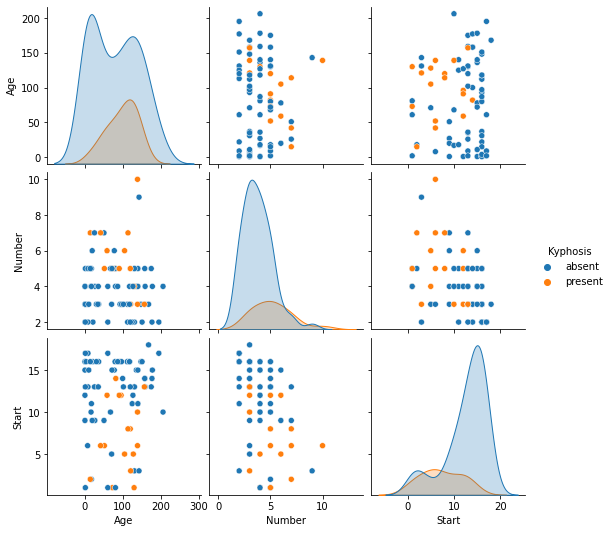

In [5]:
sns.pairplot(df, hue = 'Kyphosis')

In [15]:
target = pd.get_dummies(df['Kyphosis'], drop_first=True)

In [16]:
target.head()

,present
0,0
1,0
2,1
3,0
4,0


In [17]:
df = pd.concat([df, target], axis = 1)

In [18]:
df.head()

,Kyphosis,Age,Number,Start,present
0,absent,71,3,5,0
1,absent,158,3,14,0
2,present,128,4,5,1
3,absent,2,5,1,0
4,absent,1,4,15,0


In [19]:
df = df.drop('Kyphosis', axis = 1)

In [33]:
df

,Age,Number,Start,present
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0
...,...,...,...,...
76,157,3,13,1
77,26,7,13,0
78,120,2,13,0
79,42,7,6,1


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = df.drop('present', axis = 1)

In [37]:
y = df['present'] 

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()

In [45]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
predictions = dtree.predict(x_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.50      0.56      0.53         9

    accuracy                           0.64        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.65      0.64      0.64        25



In [49]:
print(confusion_matrix(y_test, predictions))

[[11  5]
 [ 4  5]]


#Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier()

In [53]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
rfc_pred = rfc.predict(x_test)

In [55]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        16
           1       0.33      0.11      0.17         9

    accuracy                           0.60        25
   macro avg       0.48      0.49      0.45        25
weighted avg       0.53      0.60      0.53        25



In [56]:
print(confusion_matrix(y_test, rfc_pred))

[[14  2]
 [ 8  1]]


#Project on Decision Tree & Random Forest

In [62]:
loan = pd.read_csv('/content/loan_data.csv')

In [63]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


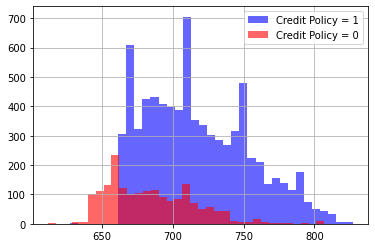

In [67]:
loan[loan['credit.policy']==1]['fico'].hist(bins = 35, color = 'blue' , label = 'Credit Policy = 1', alpha = 0.6)
loan[loan['credit.policy']==0]['fico'].hist(bins= 35, color = 'red', label = 'Credit Policy = 0', alpha = 0.6)
plt.legend()

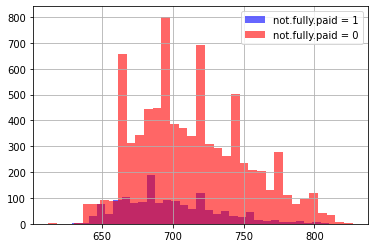

In [68]:
loan[loan['not.fully.paid']==1]['fico'].hist(bins = 35, color = 'blue' , label = 'not.fully.paid = 1', alpha = 0.6)
loan[loan['not.fully.paid']==0]['fico'].hist(bins= 35, color = 'red', label = 'not.fully.paid = 0', alpha = 0.6)
plt.legend()

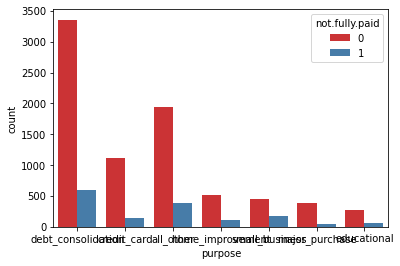

In [69]:
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loan, palette = 'Set1')

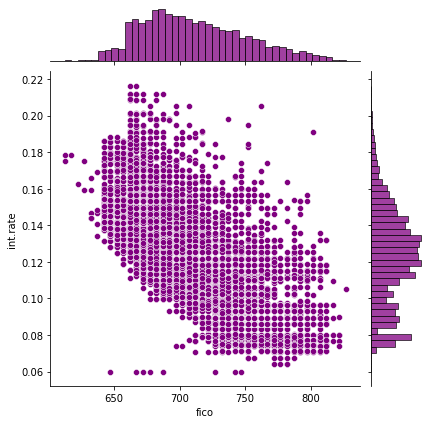

In [71]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loan, color='purple')

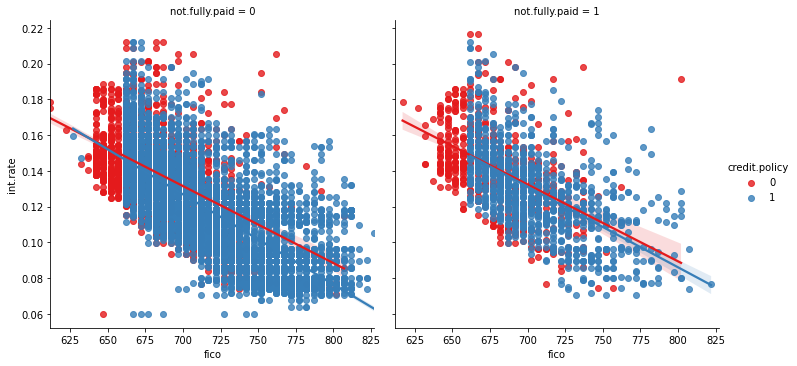

In [75]:
sns.lmplot(y = 'int.rate', x = 'fico', data=loan,hue = 'credit.policy', col = 'not.fully.paid', palette= 'Set1')

In [76]:
cat_feats = ['purpose']

In [78]:
final_data = pd.get_dummies(loan, columns=cat_feats, drop_first=True)

In [79]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtree = DecisionTreeClassifier()

In [86]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
pred = dtree.predict(x_test)

In [88]:
print(confusion_matrix(y_test, pred))

[[2026  383]
 [ 357  108]]


In [89]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2409
           1       0.22      0.23      0.23       465

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.75      2874



In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier()

In [93]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
rfc_pred = rfc.predict(x_test)

In [95]:
print(confusion_matrix(y_test, rfc_pred))

[[2397   12]
 [ 448   17]]


In [96]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2409
           1       0.59      0.04      0.07       465

    accuracy                           0.84      2874
   macro avg       0.71      0.52      0.49      2874
weighted avg       0.80      0.84      0.78      2874

